In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import levene

# Read the data into a DataFrame
data = pd.read_csv('data.csv') 

#a. Checking the distribution of all the classes:

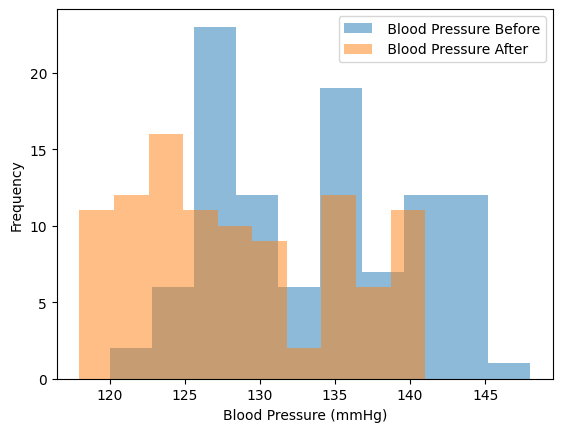

In [2]:
# Plot histograms of the variables
plt.hist(data[' Blood Pressure Before (mmHg)'], bins=10, alpha=0.5, label=' Blood Pressure Before')
plt.hist(data[' Blood Pressure After (mmHg)'], bins=10, alpha=0.5, label=' Blood Pressure After')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#b. Checking the equality of variance

In [10]:
# Perform Levene's test for equality of variances
statistic, p_value = levene(data[' Blood Pressure Before (mmHg)'], data[' Blood Pressure After (mmHg)'])

# Set significance level (alpha)
alpha = 0.05

# Compare p-value to significance level
if p_value > alpha:
    conclusion = "The variances are statistically equal (fail to reject null hypothesis)"
else:
    conclusion = "The variances are not statistically equal (reject null hypothesis)"



print('p-value:', p_value)
print("Levene's test conclusion:", conclusion)


p-value: 0.6715080090945376
Levene's test conclusion: The variances are statistically equal (fail to reject null hypothesis)


#c. Performance of LDA and QDA

In [18]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Assume class labels
data['Class'] = ['Before Treatment'] * 50 + ['After Treatment'] * 50
# I divided the data into before treatment and after treatment equally as there were no data labels given for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[[' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)']],
                                                    data['Class'], test_size=0.2, random_state=42)

# Create and train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Create and train QDA classifier
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on the test set
lda_predictions = lda.predict(X_test)
qda_predictions = qda.predict(X_test)

# Evaluate the accuracy of the classifiers
lda_accuracy = accuracy_score(y_test, lda_predictions)
qda_accuracy = accuracy_score(y_test, qda_predictions)

print("LDA Accuracy:", lda_accuracy)
print("QDA Accuracy:", qda_accuracy)


LDA Accuracy: 0.7
QDA Accuracy: 0.6


LDA would perform better on this data for classification as it scored greater accuracy compared to QDA

In [19]:
data

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg),Class
0,1,130,120,Before Treatment
1,2,142,135,Before Treatment
2,3,120,118,Before Treatment
3,4,135,127,Before Treatment
4,5,148,140,Before Treatment
...,...,...,...,...
95,96,136,129,After Treatment
96,97,143,137,After Treatment
97,98,127,123,After Treatment
98,99,139,135,After Treatment


#d. Checking the equality of mean between all the classes:

In [24]:
from scipy.stats import ttest_ind

# Extract the data for each class
before_treatment = data[data['Class'] == 'Before Treatment'][' Blood Pressure Before (mmHg)']
after_treatment = data[data['Class'] == 'After Treatment'][' Blood Pressure After (mmHg)']

# Perform t-test
statistic, p_value = ttest_ind(before_treatment, after_treatment)

print('T-test statistic:', statistic)
print('p-value:', p_value)

# Set significance level (alpha)
alpha = 0.05

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    conclusion = "There is a significant difference in means between 'Before Treatment' and 'After Treatment' classes (reject null hypothesis)"
else:
    conclusion = "There is no significant difference in means between 'Before Treatment' and 'After Treatment' classes (fail to reject null hypothesis)"

print("T-test conclusion:", conclusion)



T-test statistic: 4.049767262678321
p-value: 0.00010260016269085749
T-test conclusion: There is a significant difference in means between 'Before Treatment' and 'After Treatment' classes (reject null hypothesis)
